Predicting Optimal Fertilizers  
goal: select the best fertilizer for different weather, soil condition and crops  


In [1]:
import pandas as pd
import numpy as np


In [2]:
df_train = pd.read_csv(r'D:\Python Code VS\kaggle_compt_data\playground-series-s5e6\train.csv')

In [3]:
df_train.head(10)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
5,5,30,59,29,Red,Pulses,10,0,9,20-20
6,6,27,62,53,Sandy,Paddy,26,15,22,28-28
7,7,36,62,44,Red,Pulses,30,12,35,14-35-14
8,8,36,51,32,Loamy,Tobacco,19,17,29,17-17-17
9,9,28,50,35,Red,Tobacco,25,12,16,20-20


try model 1: decision tree, 

In [4]:
#drop unnecessary columns
df = df_train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [5]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [6]:
df.groupby(['Fertilizer Name', 'Crop Type']).size()

Fertilizer Name  Crop Type  
10-26-26         Barley          9447
                 Cotton         10204
                 Ground Nuts     9087
                 Maize           9821
                 Millets         9300
                                ...  
Urea             Paddy          10958
                 Pulses          8222
                 Sugarcane       6314
                 Tobacco         8362
                 Wheat           8709
Length: 77, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [9]:
# use best_clf to predict
y_pred = best_clf.predict(X_test)
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.16120666666666666


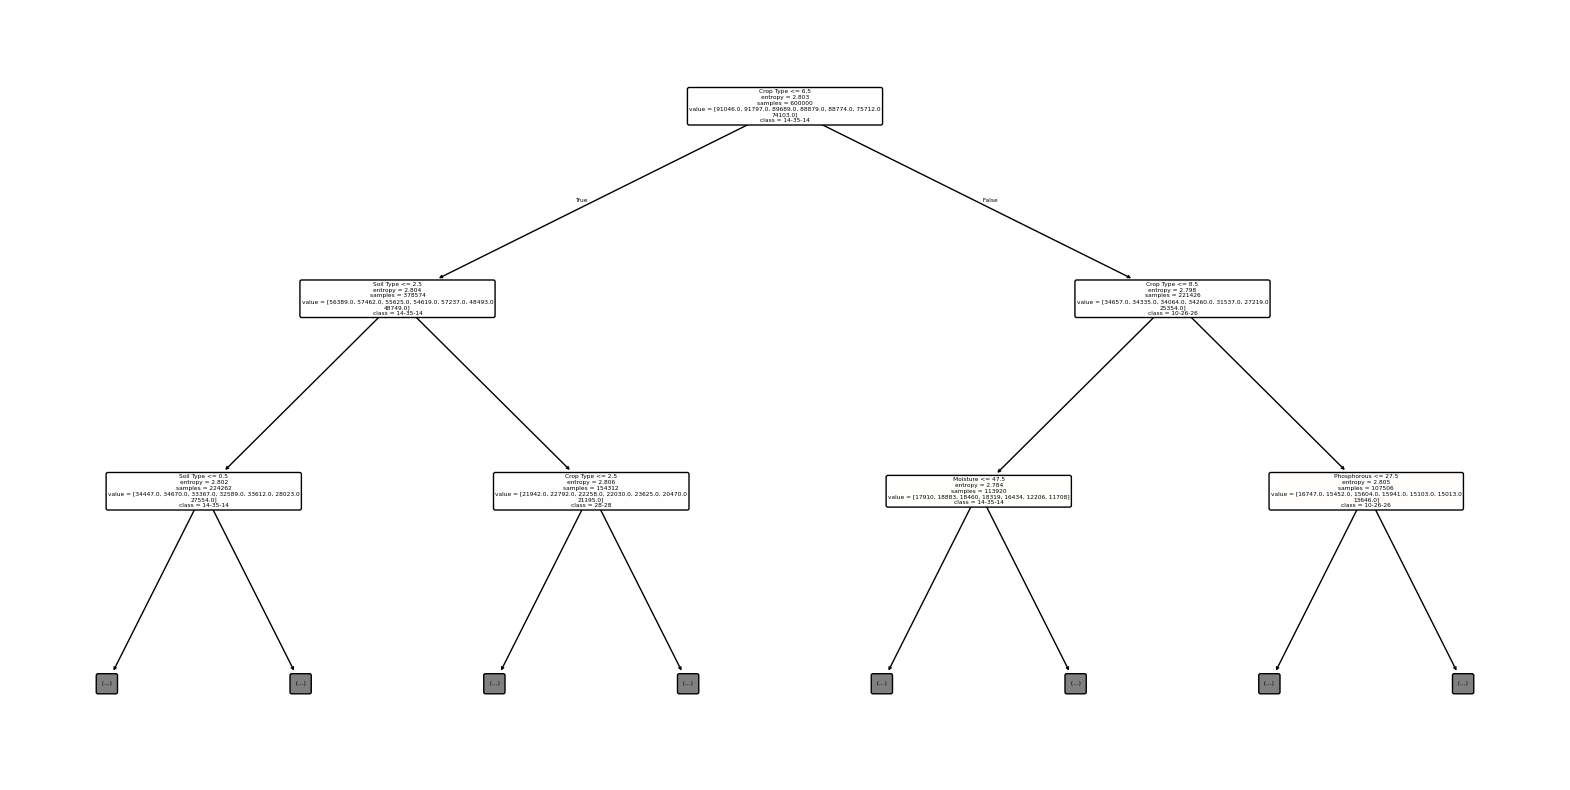

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    filled=True,
    feature_names=X.columns,
    class_names=encoder.inverse_transform(np.unique(y)),
    rounded=True,
    max_depth=2  # Show only top 3 levels (root + 2 splits)
)
plt.show()

In [14]:
df_test = pd.read_csv(r'D:\Python Code VS\kaggle_compt_data\playground-series-s5e6\test.csv')
df_test.info()
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [ ]:
# Encode categorical variables in the test set
for col in categorical_cols_test:
    df_test[col] = encoder.fit_transform(df_test[col])
    
df_test_X = df_test.copy()
# Predict on the test set
df_test_y_pred = best_clf.predict(df_test_X)

In [62]:
df_test_y_pred

array([0, 2, 0, ..., 0, 0, 1])

In [66]:
df_train.info()
df_train_1 = df_train.copy()
encoder_1 = LabelEncoder()
#encode df['Fertilizer Name'] with LabelEncoder
df_train_1['Fertilizer Name'] = encoder_1.fit_transform(df_train_1['Fertilizer Name'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [69]:
#  id,Fertilizer Name 

submission = pd.DataFrame({
    'id': df_test['id'],
    'Fertilizer Name': encoder_1.inverse_transform(df_test_y_pred)  # Adding 1 to match the original labels
})
submission


,id,Fertilizer Name
0,750000,10-26-26
1,750001,17-17-17
2,750002,10-26-26
3,750003,14-35-14
4,750004,20-20
...,...,...
249995,999995,14-35-14
249996,999996,20-20
249997,999997,10-26-26
249998,999998,10-26-26


In [70]:
# Get prediction probabilities
pred_probs = best_clf.predict_proba(df_test)  # Ensure your model supports predict_proba()

# Get top 3 predictions for each row
top_3_indices = np.argsort(pred_probs, axis=1)[:, -3:]  # Get indices of top 3 classes

# Reverse indices (highest probability first)
top_3_indices = np.flip(top_3_indices, axis=1)

# Convert indices to fertilizer names using the encoder
top_3_fertilizers = np.array([encoder_1.inverse_transform(row) for row in top_3_indices])

# Create DataFrame with top 3 fertilizers
submission = pd.DataFrame({
    'id': df_test['id'],
    'Top 3 Fertilizers': [', '.join(fertilizers) for fertilizers in top_3_fertilizers]  # Format as comma-separated
})

print(submission)


            id             Top 3 Fertilizers
0       750000      10-26-26, Urea, 17-17-17
1       750001     17-17-17, 14-35-14, 28-28
2       750002     10-26-26, 28-28, 14-35-14
3       750003       14-35-14, 10-26-26, DAP
4       750004     20-20, 14-35-14, 17-17-17
...        ...                           ...
249995  999995  14-35-14, 10-26-26, 17-17-17
249996  999996        20-20, 10-26-26, 28-28
249997  999997           Urea, 10-26-26, DAP
249998  999998     10-26-26, 17-17-17, 28-28
249999  999999     14-35-14, 28-28, 17-17-17

[250000 rows x 2 columns]


In [72]:
# submission file 

submission_fmt = submission.copy()
submission_fmt['Fertilizer Name'] = submission_fmt['Top 3 Fertilizers'].str.replace(',', '')
submission_fmt = submission_fmt[['id', 'Fertilizer Name']]
submission_fmt.to_csv('Fertilizers_submission.csv', index=False, header=True)
submission_fmt.head()

,id,Fertilizer Name
0,750000,10-26-26 Urea 17-17-17
1,750001,17-17-17 14-35-14 28-28
2,750002,10-26-26 28-28 14-35-14
3,750003,14-35-14 10-26-26 DAP
4,750004,20-20 14-35-14 17-17-17
